In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr



# Read the CSV files
dataset1 = pd.read_csv('file_3_Mar18_Output_1.csv')
dataset2 = pd.read_csv('file_4_Mar18_Output_1.csv')

# Append the datasets
combined_dataset = pd.concat([dataset1, dataset2], ignore_index=True)

# Save the combined dataset to a new CSV file (optional)
combined_dataset.to_csv('combined_csv_file.csv', index=False)

dataset_corr = combined_dataset.corr()

dataset_corr

# true_resloved 
def map_value(val):
    if val == 'floor':
        return 0
    else:
        return 1

# Create new column based on conditions
combined_dataset['true_resolved'] = combined_dataset['resolved'].apply(map_value)


In [2]:
values_to_exclude = ['B', 'I', 'Z']

c2_dataset = combined_dataset[~combined_dataset['account_status_13_march'].isin(values_to_exclude)]
    

values_to_exclude2 = ['P4', 'TI', 'D3']
c3_dataset = c2_dataset[~c2_dataset['mos'].isin(values_to_exclude2)]



### last step for prediction - analysis


In [3]:
def get_last_service(s):

    services = [service for service in s.split(' ') if service != 'TR']

    return services[-1] if services else None

# Apply the function to the column and store the result in a new column 'Last service'
c3_dataset['Last service'] = combined_dataset['mos'].apply(get_last_service)

c3_resolved = c3_dataset[c3_dataset['true_resolved'] == 1]
c3_floor = c3_dataset[c3_dataset['true_resolved'] == 0]


c3_resolved

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,true_resolved,Last service
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,NaN,[00],5/19/2013,NaN,0,1,E,0,1,PP
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0.00,[00],9/4/2017,NaN,8,0,,0,1,PT
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,-6.32,[00],2/7/2024,NaN,0,0,L,0,1,BA
6,240316012428 PHX43JOI,E,10006032399,BA,IA BA,resolved,3.0,NaN,[02],9/26/2021,...,NaN,[02],9/26/2021,NaN,0,0,L,0,1,BA
7,240316171347 PHX4I164,B,10002094529,BA,IA BA,resolved,6.0,0.00,[00],9/13/2020,...,0.00,[00],9/13/2020,NaN,0,0,,0,1,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798790,240314191841 DAL27M1P,i,20012004106,PP,IA PP TR,resolved,4.0,1591.73,[00],9/19/2021,...,1591.73,[00],9/19/2021,NaN,0,0,,0,1,PP
1798791,240314075300 PHX5SRLR,b,20002002187,PP,mn IA PP TR,resolved,9.0,680.86,[00],12/19/2023,...,680.86,[00],12/19/2023,NaN,0,0,NaN,0,1,PP
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,nl
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,BA


In [4]:
combined_dataset.columns

Index(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march', 'true_resolved'],
      dtype='object')

- account_open_date : application status, card 
- account_balance : payments
- account_status : restriction changes, FM, P6, P5, 
- card_activation_status : AA
- delinquency_history : CD, IC, MP, FR,
- eservice_ind : eA, eL, eP, eR, ER, eS, eY
- ebill_enrolled_status : eB
- auto_pay_enrolled_status : enroll - low risk, PF, MP, Py
- no_of_accounts_with_syf : AS, BA

抓nl次数

In [5]:
def count_nl(string):
    return string.count("nl")

# Apply the function to create a new column in the DataFrame
c3_dataset['nl_count'] = c3_dataset['mos'].apply(count_nl)

c3_dataset['nl_count'].value_counts()

0    1149731
1     522363
2      97203
3      18996
4       5532
5        840
6         79
7         14
Name: nl_count, dtype: int64

In [6]:
nl_0 = c3_dataset[c3_dataset['nl_count'] == 0]
nl_1 = c3_dataset[c3_dataset['nl_count'] == 1]
nl_2 = c3_dataset[c3_dataset['nl_count'] == 2]
nl_3 = c3_dataset[c3_dataset['nl_count'] == 3]
nl_5 = c3_dataset[c3_dataset['nl_count'] == 5]
nl_4 = c3_dataset[c3_dataset['nl_count'] == 4]
nl_6 = c3_dataset[c3_dataset['nl_count'] == 6]
nl_7 = c3_dataset[c3_dataset['nl_count'] == 7]

print(nl_0[nl_0["resolved"] == "floor"].shape[0] / nl_0.shape[0])
print(nl_1[nl_1["resolved"] == "floor"].shape[0] / nl_1.shape[0])
print(nl_2[nl_2["resolved"] == "floor"].shape[0] / nl_2.shape[0])
print(nl_3[nl_3["resolved"] == "floor"].shape[0] / nl_3.shape[0])
print(nl_4[nl_4["resolved"] == "floor"].shape[0] / nl_4.shape[0])
print(nl_5[nl_5["resolved"] == "floor"].shape[0] / nl_5.shape[0])
print(nl_6[nl_6["resolved"] == "floor"].shape[0] / nl_6.shape[0])
print(nl_7[nl_7["resolved"] == "floor"].shape[0] / nl_7.shape[0])

0.08485289167640082
0.4041519020298145
0.42958550662016604
0.4421457148873447
0.5600144613159798
0.6023809523809524
0.5443037974683544
0.5714285714285714


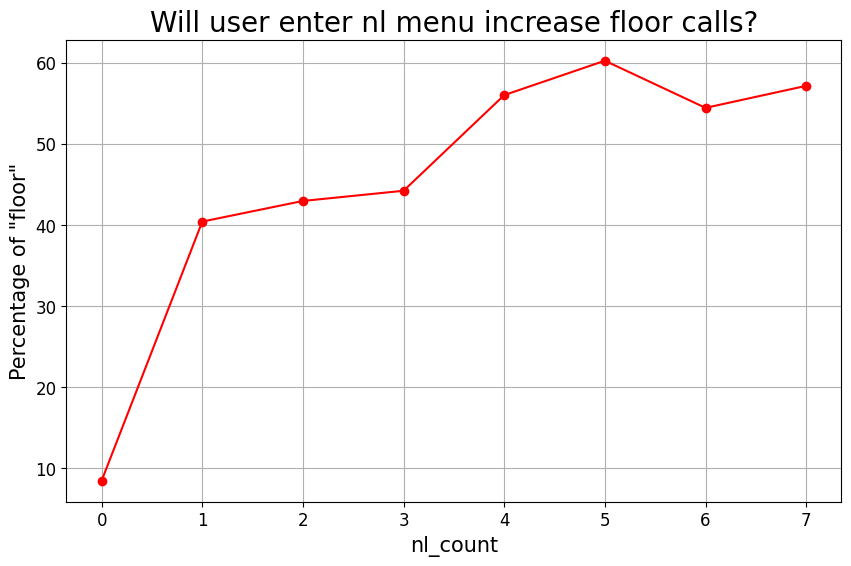

In [7]:
import matplotlib.pyplot as plt

# Calculate the percentage of "floor" for each nl_count
nl_counts = [0, 1, 2, 3, 4, 5, 6, 7]
percentages = []
for nl_count in nl_counts:
    nl_data = c3_dataset[c3_dataset['nl_count'] == nl_count]
    floor_count = nl_data[nl_data['resolved'] == "floor"].shape[0]
    total_count = nl_data.shape[0]
    percentage = floor_count / total_count * 100
    percentages.append(percentage)

# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.title('Will user enter nl menu increase floor calls?', fontsize=20)
plt.plot(nl_counts, percentages, color='red', linestyle='-', marker='o', label='Line connecting points')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('nl_count', fontsize=15)
plt.ylabel('Percentage of "floor"', fontsize=15)
plt.grid(True)
plt.show()


In [8]:
column_name = ['no_of_accounts_with_syf', 'delinquency_history','account_open_date', 'account_status', 'card_activation_status', 'eservice_ind', 'ebill_enrolled_status', 'auto_pay_enrolled_status']
for name in column_name:
    a = name + '_13_march'
    b = name + '_18_march'
    c = name + '_changed'
    # Replace non-finite values with "Not_Exist" before comparison
    a_values = c3_dataset[a].fillna("Not_Exist")
    b_values = c3_dataset[b].fillna("Not_Exist")
    
    # Perform the comparison and cast the result to integer
    c3_dataset[c] = (a_values == b_values)
    
c3_dataset['account_balance_changed'] = c3_dataset['account_balance_18_march'] - c3_dataset['account_balance_13_march']

In [9]:
changed_columns = [name + '_changed' for name in column_name]

for column in changed_columns:
    print(c3_dataset[column].value_counts())

True     1777651
False      17107
Name: no_of_accounts_with_syf_changed, dtype: int64
True     1766056
False      28702
Name: delinquency_history_changed, dtype: int64
True     1794756
False          2
Name: account_open_date_changed, dtype: int64
True     1760474
False      34284
Name: account_status_changed, dtype: int64
True     1759237
False      35521
Name: card_activation_status_changed, dtype: int64
True     1786721
False       8037
Name: eservice_ind_changed, dtype: int64
True     1773444
False      21314
Name: ebill_enrolled_status_changed, dtype: int64
True     1793595
False       1163
Name: auto_pay_enrolled_status_changed, dtype: int64


In [10]:
# # Function to create a pie chart for the given dataset and title, showing only top 10 occurrences
# def create_pie_chart(dataset, title):
#     # Count the occurrences of unique values in the 'Last service' column and get top 10
#     mos_counts = dataset['Last service'].value_counts().head(5)
#     # Add an 'Others' category if there are more than 10 unique values
#     if len(dataset['Last service'].value_counts()) > 5:
#         others_count = dataset['Last service'].value_counts()[5:].sum()
#         mos_counts['Others'] = others_count
#     # Set up the pie chart
#     plt.figure(figsize=(8, 6))
#     plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
#     plt.title(title)
#     plt.show()

    
# # Create the pie chart for the c3_floor dataset, showing only the top 10 'Last service' values
# create_pie_chart(c3_dataset, 'Total Cases Distribution by Last service (Top 5)')

In [11]:
def get_last_service(s):

    services = [service for service in s.split(' ') if service != 'TR' and service != 'nl' and service != 'ss' and service != 'm-' and service != 'me' and service != 'mm' and service != 'mn' and service != 'mo' and service != "mp" and service != "mt" and service != 'LW' and service != 'NU' and service != 'PX' and service != 'DE' and service != 'iS' and service != 'SP' and service != 'TP' and service != 'mP' and service != 'eY' and service != 'iP' and service != 'MP' and service != 'PA' and service != 'PC' and service != 'PS' and service != 'RI' and service != 'VP' and service != 'AT' and service != 'BA' and service != 'MR' and service != 'Mr'and service != 'AT' and service != 'TS'and service != 'PP' and service != 'IA']
    return services[-1] if services else None

# Apply the function to the column and store the result in a new column 'Last service'
c3_dataset['Last service'] = combined_dataset['mos'].apply(get_last_service)

c3_resolved = c3_dataset[c3_dataset['true_resolved'] == 1]
c3_floor = c3_dataset[c3_dataset['true_resolved'] == 0]

In [12]:
c3_dataset['Last service']

0          None
1          None
2            PT
3          None
4          None
           ... 
1798793      TA
1798794    None
1798795    None
1798796    None
1798797      LS
Name: Last service, Length: 1794758, dtype: object

In [13]:
c3_dataset['Last service'].value_counts().shape

(52,)

In [14]:
c3_dataset[c3_dataset['Last service'].isna()].shape[0]/c3_dataset.shape[0]

0.6292664526359543

In [15]:
c3_dataset['Last service'].value_counts().sum()

665377

In [16]:
c3_dataset[(c3_dataset['Last service'] == "PT") & (c3_dataset["resolved"] == "floor")].shape[0] / c3_dataset[(c3_dataset['Last service'] == "PT")].shape[0]

0.08132660418168709

In [17]:
c3_dataset['TR_exists'] = c3_dataset["mos"].str.contains("TR")

df_TR_resolved = c3_dataset[(c3_dataset['resolved'] == "resolved") & (c3_dataset['TR_exists'] == True)]
df_TR_total = c3_dataset[c3_dataset['TR_exists'] == True]

df_TR_resolved.shape[0] / df_TR_total.shape[0]

0.7081610496599321

In [18]:
c3_dataset['last_two_digits'] = c3_dataset["account_open_date_13_march"].str[-2:].astype(int)

old = c3_dataset[(c3_dataset['last_two_digits'] <= 10) | (c3_dataset['last_two_digits'] > 55) | (c3_dataset['last_two_digits'] == 0)]
new = c3_dataset[(c3_dataset['last_two_digits'] > 10) & (c3_dataset['last_two_digits'] <= 24)]

old_floor = c3_dataset[((c3_dataset['last_two_digits'] <= 10) | (c3_dataset['last_two_digits'] > 55) | (c3_dataset['last_two_digits'] == 0)) & (c3_dataset['resolved'] == "floor")]
new_floor = c3_dataset[((c3_dataset['last_two_digits'] > 10) & (c3_dataset['last_two_digits'] <= 24)) & (c3_dataset['resolved'] == "floor")]

print(c3_dataset.shape[0])
print(old.shape[0])
print(new.shape[0])

print(old_floor.shape[0])
print(new_floor.shape[0])

print(old_floor.shape[0] / old.shape[0])
print(new_floor.shape[0] / new.shape[0])

1794758
165207
1629547
33272
329210
0.20139582463212818
0.2020254708823986


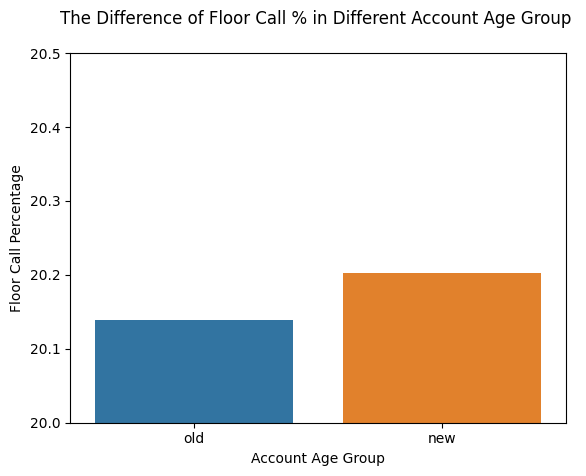

In [19]:
import seaborn as sns

# Sample data
x = ['old', 'new']
y = [old_floor.shape[0] / old.shape[0] * 100, new_floor.shape[0] / new.shape[0] * 100]

# Create bar plot
sns.barplot(x=x, y=y)

plt.ylim(20, 20.5) 

# Add labels and title
plt.xlabel('Account Age Group')
plt.ylabel('Floor Call Percentage')
plt.title("The Difference of Floor Call % in Different Account Age Group \n")

# Show plot
plt.show()

In [20]:
floor_ls = c3_dataset[c3_dataset["resolved"] == "floor"] 

ovc = c3_dataset['Last service'].value_counts()
fvc = floor_ls['Last service'].value_counts()

set1 = set(ovc.index)
set2 = set(fvc.index)

indices_not_in_both = set1 ^ set2

missing_indices = list(indices_not_in_both)
missing_series = pd.Series(0, index=missing_indices)
fvc = pd.concat([fvc, missing_series])
ovc = ovc.sort_index()
fvc = fvc.sort_index()
# print(fvc.values)
# print(ovc.values)

fptg = fvc.values / ovc.values * 100

fptg

array([22.31670999, 63.88482186, 43.01675978, 85.47486034, 87.01472557,
       54.39783491, 15.22419187, 80.83333333, 89.72843675, 61.22112211,
       25.58827484,  0.        , 84.67465753, 89.76034858, 60.86044071,
       80.20726901, 56.1529777 , 75.29842126, 78.72932221, 20.52980132,
       18.93653135,  8.13266042, 67.89325843, 89.68650613, 19.08713693,
       91.91038379, 57.34331151, 19.56853034,  7.06773244,  5.18973214,
        4.42183932, 56.25      ,  9.46745562,  9.0548054 ,  6.06674984,
       52.77777778, 59.375     , 48.56972586, 64.03508772, 48.14814815,
       67.73596545, 63.85542169, 72.09302326, 60.        , 66.25      ,
       68.75      , 41.42538976, 45.40540541,  0.        , 73.95833333,
       66.66666667, 91.23746738])

In [21]:
nl_t = c3_dataset.groupby('Last service')['nl_count'].mean()
nl_t

Last service
AA    0.503142
AP    1.350740
AU    1.942893
BL    0.988827
Ba    1.047523
CA    1.373478
CB    0.662843
CD    1.397917
CT    1.477417
DP    0.280116
DR    0.274708
ER    1.635514
FI    0.020976
FM    1.116558
GA    1.846800
HI    0.667640
IC    0.748659
LC    1.039180
LS    1.121651
OB    0.516556
PI    0.465710
PT    0.903033
Pd    0.157584
RC    1.194911
RP    1.852697
RS    1.111681
SR    1.298410
TA    0.784741
TB    1.893984
TC    1.766183
TD    1.879178
TE    1.437500
TL    1.761341
TN    1.852264
Ta    0.686837
Te    1.388889
VA    1.375000
WA    1.703218
eA    1.369883
eB    1.000000
eL    1.130167
eP    1.204819
eR    1.151163
eS    0.900000
iA    0.700000
iF    2.125000
iL    1.937639
iM    1.778378
iO    0.277778
iR    1.611520
iT    0.333333
wa    1.124502
Name: nl_count, dtype: float64

In [23]:
c3_dataset[["time", "location"]] = c3_dataset["timestamp_call_key"].str.split(" ", 1, expand=True)
c3_dataset["date"] = c3_dataset["time"].str[4:6]

In [24]:
thirteen = c3_dataset[c3_dataset['date'] == "13"]
fourteen = c3_dataset[c3_dataset['date'] == "14"]
fifteen = c3_dataset[c3_dataset['date'] == "15"]
sixteen = c3_dataset[c3_dataset['date'] == "16"]
sevteen = c3_dataset[c3_dataset['date'] == "17"]

at_13 = thirteen['serial'].value_counts()
at_14 = fourteen['serial'].value_counts()
at_15 = fifteen['serial'].value_counts()
at_16 = sixteen['serial'].value_counts()
at_17 = sevteen['serial'].value_counts()

In [25]:
print(at_13.unique())
print(at_14.unique())
print(at_15.unique())
print(at_16.unique())
print(at_17.unique())

[1]
[24 12 11 10  9  8  7  6  5  4  3  2  1]
[20 19 17 14 12 11 10  9  8  7  6  5  4  3  2  1]
[14 13 12 10  9  8  7  6  5  4  3  2  1]
[16 14 13 11 10  9  8  7  6  5  4  3  2  1]


In [26]:
union_set = set(at_14) | set(at_15) | set(at_16) | set(at_17)
union_set = set(at_14).union(at_15, at_16, at_17)
len(union_set)
union_set

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 24}

In [35]:
at_14 = at_14.sort_values(ascending=False)
at_14 = at_14[at_14>1]

combined_series = pd.concat([at_14, at_15, at_16, at_17])
combined_series = combined_series.value_counts()

recall = pd.DataFrame({'Recall Counts': combined_series.index, 'Frequency': combined_series.values})
recall

,Recall Counts,Frequency
0,2,135799
1,3,18663
2,4,3706
3,5,911
4,6,285
5,7,96
6,8,48
7,9,26
8,10,9
9,11,5


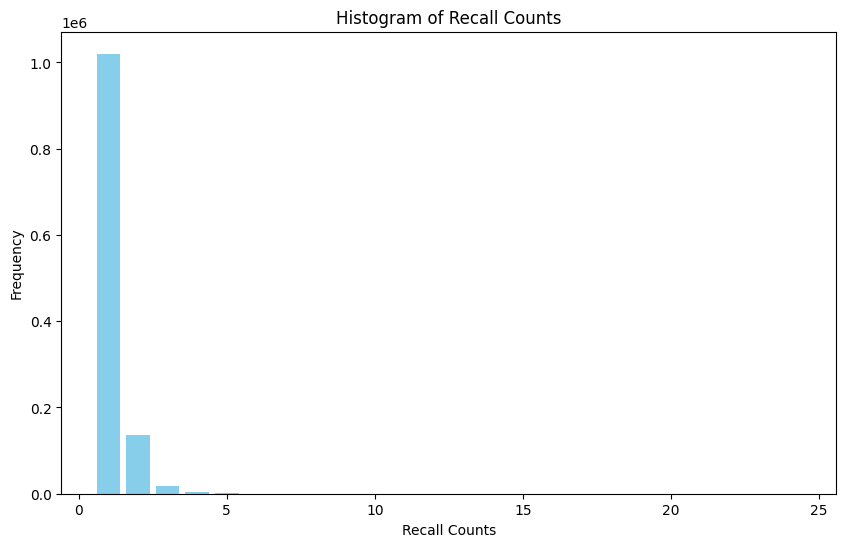

In [28]:
import matplotlib.pyplot as plt

# Assuming 'recall_counts' is your Series
# Extract values and counts from the Series
values = combined_series.index
counts = combined_series.values

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(values, counts, color='skyblue')

# Add labels and title
plt.xlabel('Recall Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Recall Counts')

# Show the plot
plt.show()


In [37]:
accuracy = pd.read_csv("modified_accuracy_report.csv")
accuracy = accuracy.rename(columns={'Service': 'Last Service before Transfer'})

In [44]:
table = pd.DataFrame({'Attribute': ovc.index,
                          'Prediction Accuracy' : accuracy["Accuracy"],
                          'Avg nl Count': nl_t.values,
                           'Total Floor%': fptg.round(3)
                          })



table = table.sort_values(by='Attribute')

In [ ]:
table.to_csv("final_table.csv")

In [72]:
table[:25]

,Attribute,Prediction Accuracy,Avg nl Count,Total Floor%
0,AA,75.633058,0.503142,22.317
1,AP,97.689930,1.350740,63.885
2,AU,0.869025,1.942893,43.017
3,BL,96.648045,0.988827,85.475
4,Ba,0.000000,1.047523,87.015
5,CA,89.309878,1.373478,54.398
6,CB,59.228363,0.662843,15.224
7,CD,96.875000,1.397917,80.833
8,CT,96.679330,1.477417,89.728
9,DP,54.579208,0.280116,61.221


In [69]:
attributes_set1 = table['Attribute'][:25]
attributes_set2 = table['Attribute'][25:]

prediction_accuracy_set1 = table['Prediction Accuracy'][:25]
prediction_accuracy_set2 = table['Prediction Accuracy'][25:]

total_floor_percentage_set1 = table['Total Floor%'][:25]
total_floor_percentage_set2 = table['Total Floor%'][25:]



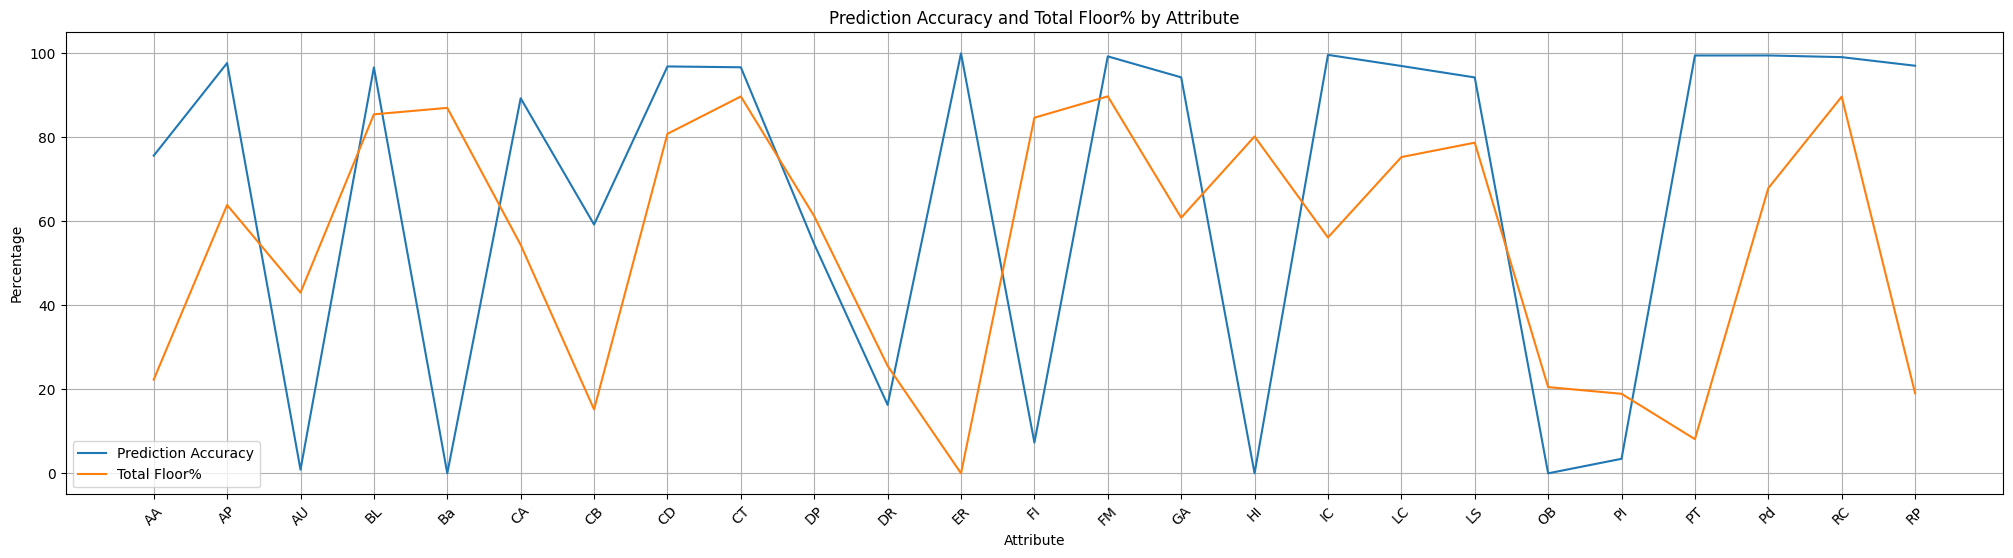

In [75]:
plt.figure(figsize=(25, 6))

plt.plot(table[:25]['Attribute'], table[:25]['Prediction Accuracy'], label='Prediction Accuracy')
plt.plot(table[:25]['Attribute'], table[:25]['Total Floor%'], label='Total Floor%')

plt.xlabel('Attribute')
plt.ylabel('Percentage')
plt.title('Prediction Accuracy and Total Floor% by Attribute')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

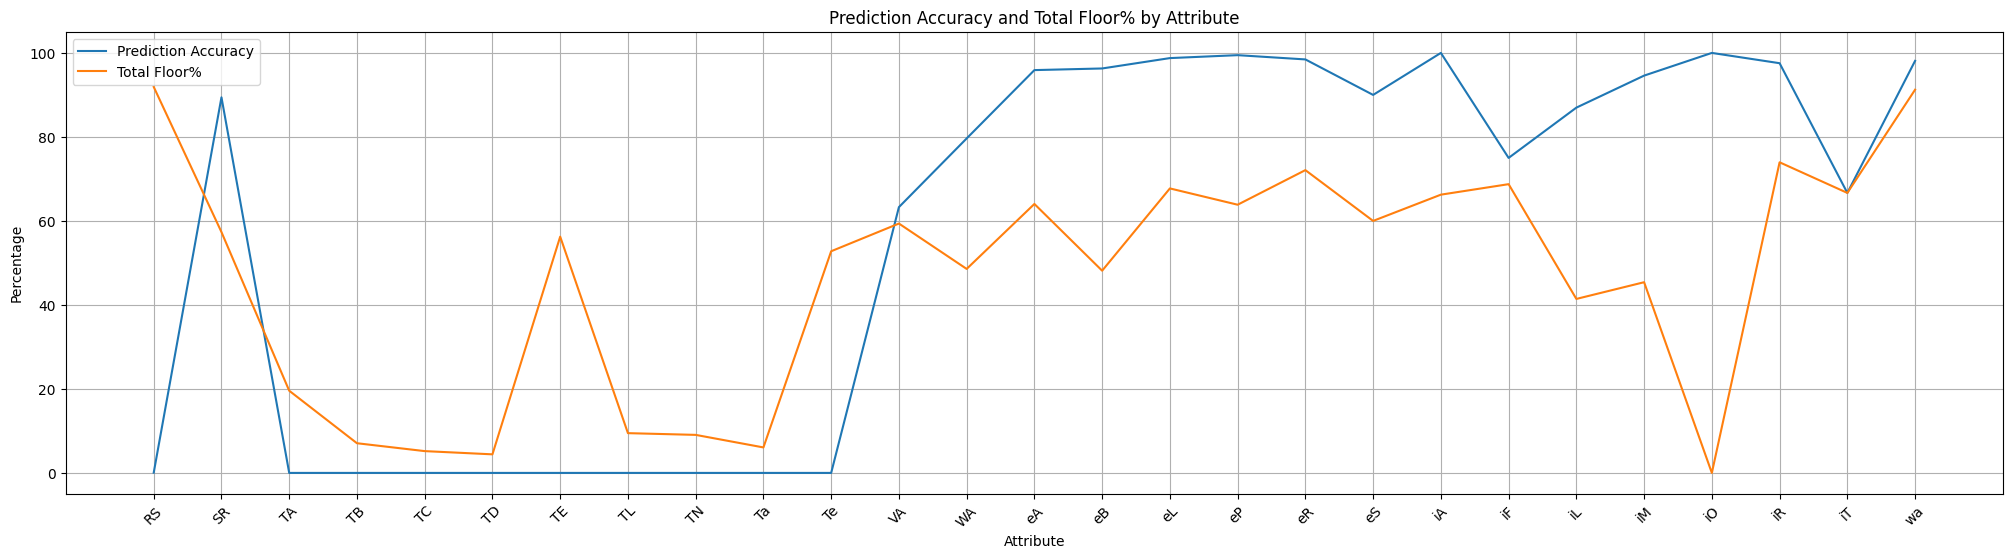

In [76]:
plt.figure(figsize=(25, 6))

plt.plot(table[25:]['Attribute'], table[25:]['Prediction Accuracy'], label='Prediction Accuracy')
plt.plot(table[25:]['Attribute'], table[25:]['Total Floor%'], label='Total Floor%')

plt.xlabel('Attribute')
plt.ylabel('Percentage')
plt.title('Prediction Accuracy and Total Floor% by Attribute')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)